# Graded Challenge

`Ardiansyah Arya Salvinia | Batch 016`

## Description

### Objective

`Mencari Pertumbuhan Covid di Indonesia dari tahun 2019 sampai 2022, persentase meninggal bila dibandingkan dengan jumlah kasus infeksi, dan membandingkan tingkat kematian oleh penyakit covid di indonesia dengan negara-negara di asia tenggara`

### Problem Statement

`Ingin mengetahui pertumbuhan covid di Indonesia dan ingin tahu apakah penanganan covid di Indonesia lebih baik/buruk bila dibandingkan dengan negara-negara asia tenggara`

## Working Area


### Import Library dan Packages

In [376]:
#import library dan packages yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Data Loading

Query SQL


Mengambil 1000 data untuk melihat tabel secara ringkas dan data apa saja yang bisa diolah oleh penulis

'''
SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
LIMIT 1000;
'''

Melakukan query nama nama negara asia tenggara yang akan diolah datanya dan untuk memastikan apakah negara tersebut ada datanya atau tidak dengan menggunakan distinct agar lebih terjabarkan

'''
SELECT DISTINCT country_region FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
WHERE country_region in ('Indonesia', 'Singapore', 'Malaysia', 'Cambodia', 'Laos', 'Myanmar', 'Thailand', 'Vietnam', 'Brunei', 'Philippines', 'East Timor');
'''

Diketahui bahwa myanmar tidak terdeteksi menggunakan query diatas

Melakukan query khusus untuk burma (nama lain dari myanmar)

'''
SELECT country_region FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region LIKE 'Burma';
'''

Ternyata pada data ini Myanmar diberi nama burma

'''
SELECT country_region FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region LIKE 'Timor-Leste';
'''
'''
SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region LIKE 'East Timor';
'''
Ternyata ditemukan juga ada 2 penamaan untuk timor leste yaitu "East Timor" dan "Timor-Leste"

Melakukan query final untuk mendapatkan semua data dari tabel summary untuk diolah

'''
SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
WHERE country_region in ('Indonesia', 'Singapore', 'Malaysia', 'Cambodia', 'Laos', 'Burma', 'Thailand', 'Vietnam', 'Brunei', 'Philippines', 'East Timor', 'Timor-Leste');
'''


Load CSV file

In [377]:
df = pd.read_csv('summary.csv')  # Load dan membaca data csv

In [378]:
pd.set_option("display.max.columns", None) # Setting kolom maksimal yang dapat ditampilkan

In [379]:
df #memeriksa data CSV

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Malaysia,2020-03-14,4.210500,101.975800,POINT(101.9758 4.2105),238.0,0.0,35.0,NaN,NaN,NaN,NaN
1,NaN,Singapore,2020-03-14,1.352100,103.819800,POINT(103.8198 1.3521),212.0,0.0,105.0,NaN,NaN,NaN,NaN
2,NaN,Philippines,2020-03-14,12.879700,121.774000,POINT(121.774 12.8797),111.0,8.0,2.0,NaN,NaN,NaN,NaN
3,NaN,Thailand,2020-03-14,15.870000,100.992500,POINT(100.9925 15.87),82.0,1.0,35.0,NaN,NaN,NaN,NaN
4,NaN,Vietnam,2020-03-14,14.058300,108.277200,POINT(108.2772 14.0583),53.0,0.0,16.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16664,NaN,Timor-Leste,2021-10-09,-8.874217,125.727539,POINT(125.727539 -8.874217),19661.0,119.0,NaN,NaN,NaN,NaN,Timor-Leste
16665,NaN,Timor-Leste,2021-02-05,-8.874217,125.727539,POINT(125.727539 -8.874217),80.0,0.0,61.0,19.0,NaN,NaN,Timor-Leste
16666,NaN,Timor-Leste,2021-03-13,-8.874217,125.727539,POINT(125.727539 -8.874217),178.0,0.0,94.0,84.0,NaN,NaN,Timor-Leste
16667,NaN,Timor-Leste,2021-08-12,-8.874217,125.727539,POINT(125.727539 -8.874217),11870.0,29.0,NaN,NaN,NaN,NaN,Timor-Leste


In [380]:
df.head(10) # Melihat 10 data teratas pada dataset

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Malaysia,2020-03-14,4.210500,101.975800,POINT(101.9758 4.2105),238.0,0.0,35.0,NaN,NaN,NaN,NaN
1,NaN,Singapore,2020-03-14,1.352100,103.819800,POINT(103.8198 1.3521),212.0,0.0,105.0,NaN,NaN,NaN,NaN
2,NaN,Philippines,2020-03-14,12.879700,121.774000,POINT(121.774 12.8797),111.0,8.0,2.0,NaN,NaN,NaN,NaN
3,NaN,Thailand,2020-03-14,15.870000,100.992500,POINT(100.9925 15.87),82.0,1.0,35.0,NaN,NaN,NaN,NaN
4,NaN,Vietnam,2020-03-14,14.058300,108.277200,POINT(108.2772 14.0583),53.0,0.0,16.0,NaN,NaN,NaN,NaN
5,NaN,Cambodia,2020-03-14,12.565700,104.991000,POINT(104.991 12.5657),7.0,0.0,1.0,NaN,NaN,NaN,NaN
6,NaN,Malaysia,2020-04-06,4.210484,101.975766,POINT(101.975766 4.210484),3793.0,62.0,1241.0,2490.0,NaN,NaN,Malaysia
7,NaN,Malaysia,2020-04-12,4.210484,101.975766,POINT(101.975766 4.210484),4683.0,76.0,2108.0,2499.0,NaN,NaN,Malaysia
8,NaN,Malaysia,2020-03-07,2.500000,112.500000,POINT(112.5 2.5),93.0,0.0,23.0,NaN,NaN,NaN,NaN
9,NaN,Thailand,2020-03-07,15.000000,101.000000,POINT(101 15),50.0,1.0,31.0,NaN,NaN,NaN,NaN


In [381]:
df.tail(10) # Melihat 10 data terbawah pada dataset

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
16659,NaN,Timor-Leste,2021-12-25,-8.874217,125.727539,POINT(125.727539 -8.874217),19833.0,122.0,NaN,NaN,NaN,NaN,Timor-Leste
16660,NaN,Timor-Leste,2022-02-19,-8.874217,125.727539,POINT(125.727539 -8.874217),22314.0,125.0,NaN,NaN,NaN,NaN,Timor-Leste
16661,NaN,Timor-Leste,2022-03-27,-8.874217,125.727539,POINT(125.727539 -8.874217),22821.0,130.0,NaN,NaN,NaN,NaN,Timor-Leste
16662,NaN,Timor-Leste,2020-04-17,-8.874217,125.727539,POINT(125.727539 -8.874217),18.0,0.0,1.0,17.0,NaN,NaN,Timor-Leste
16663,NaN,Timor-Leste,2021-09-20,-8.874217,125.727539,POINT(125.727539 -8.874217),19058.0,105.0,NaN,NaN,NaN,NaN,Timor-Leste
16664,NaN,Timor-Leste,2021-10-09,-8.874217,125.727539,POINT(125.727539 -8.874217),19661.0,119.0,NaN,NaN,NaN,NaN,Timor-Leste
16665,NaN,Timor-Leste,2021-02-05,-8.874217,125.727539,POINT(125.727539 -8.874217),80.0,0.0,61.0,19.0,NaN,NaN,Timor-Leste
16666,NaN,Timor-Leste,2021-03-13,-8.874217,125.727539,POINT(125.727539 -8.874217),178.0,0.0,94.0,84.0,NaN,NaN,Timor-Leste
16667,NaN,Timor-Leste,2021-08-12,-8.874217,125.727539,POINT(125.727539 -8.874217),11870.0,29.0,NaN,NaN,NaN,NaN,Timor-Leste
16668,NaN,Timor-Leste,2021-04-21,-8.874217,125.727539,POINT(125.727539 -8.874217),1509.0,2.0,760.0,747.0,NaN,NaN,Timor-Leste


Terdapat 16669 baris dan 13 kolom pada dataset ini

In [382]:
df.info() # Melihat rangkuman data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16669 entries, 0 to 16668
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  6460 non-null   object 
 1   country_region  16669 non-null  object 
 2   date            16669 non-null  object 
 3   latitude        16071 non-null  float64
 4   longitude       16071 non-null  float64
 5   location_geom   16071 non-null  object 
 6   confirmed       16667 non-null  float64
 7   deaths          16625 non-null  float64
 8   recovered       5860 non-null   float64
 9   active          5521 non-null   float64
 10  fips            0 non-null      float64
 11  admin2          0 non-null      float64
 12  combined_key    16292 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


In [383]:
# Penulis ingin mengubah data type date menjadi datetime, dan deaths + confirmed menjadi integer karena tidak mungkin ada desimal.
df["date"] = pd.to_datetime(df["date"])
df.dtypes

province_state            object
country_region            object
date              datetime64[ns]
latitude                 float64
longitude                float64
location_geom             object
confirmed                float64
deaths                   float64
recovered                float64
active                   float64
fips                     float64
admin2                   float64
combined_key              object
dtype: object

In [384]:
# Penulis ingin mengetahui berapa banyak data yang di input oleh tiap negara di asia tenggara.
df["country_region"].value_counts() 

Malaysia       7067
Thailand        989
Singapore       988
Vietnam         987
Cambodia        984
Philippines     982
Indonesia       949
Brunei          942
Timor-Leste     929
Laos            927
Burma           924
East Timor        1
Name: country_region, dtype: int64

Didapatkan bahwa malaysia melakukan input paling banyak dibanding negara negara di asia tenggara. dan indonesia merupakan negara ke 6 yang paling banyak menginput data.

Sebelum mengolah data covid di indonesia, penulis ingin mencari tahu kenapa data timor leste ada 1 data East Timor dan 929 data Timor-Leste.

In [385]:
# Penulis ingin menelaah tanggal data East Timor ini di input.
df.loc[df["country_region"] == "East Timor", "date"] 

70   2020-03-21
Name: date, dtype: datetime64[ns]

In [386]:
# Penulis ingin menelaah data paling awal Timor-Leste di input.
df.loc[df["country_region"] == "Timor-Leste", "date"].min() 

Timestamp('2020-03-22 00:00:00')

Ternyata hanya pada data pertama saja timor leste diberi nama East Timor dan pada data lainnya diganti menjadi Timor-Leste. Dikarenakan east timor merupakan data timor leste paling awal di input.

In [387]:
# Penulis ingin mengetahui mengapa malaysia menginput data yang sangat banyak.
df.loc[df["country_region"] == "Malaysia"]

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Malaysia,2020-03-14,4.210500,101.975800,POINT(101.9758 4.2105),238.0,0.0,35.0,NaN,NaN,NaN,NaN
6,NaN,Malaysia,2020-04-06,4.210484,101.975766,POINT(101.975766 4.210484),3793.0,62.0,1241.0,2490.0,NaN,NaN,Malaysia
7,NaN,Malaysia,2020-04-12,4.210484,101.975766,POINT(101.975766 4.210484),4683.0,76.0,2108.0,2499.0,NaN,NaN,Malaysia
8,NaN,Malaysia,2020-03-07,2.500000,112.500000,POINT(112.5 2.5),93.0,0.0,23.0,NaN,NaN,NaN,NaN
12,NaN,Malaysia,2020-03-17,4.210500,101.975800,POINT(101.9758 4.2105),673.0,2.0,49.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,Selangor,Malaysia,2021-11-17,3.073800,101.518300,POINT(101.5183 3.0738),735741.0,9710.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14807,Selangor,Malaysia,2021-12-25,3.073800,101.518300,POINT(101.5183 3.0738),781838.0,9916.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14808,Selangor,Malaysia,2022-02-19,3.073800,101.518300,POINT(101.5183 3.0738),889144.0,10111.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14809,Selangor,Malaysia,2022-03-27,3.073800,101.518300,POINT(101.5183 3.0738),1161141.0,10492.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"


Ternyata malaysia memasukan data pada beberapa provinsi mereka.

In [388]:
# Membuat query baru apakah negara lain memasukan data pada tiap provinsi juga atau tidak.
newquery= df[df["province_state"].notnull()]


In [389]:
newquery

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
116,Unknown,Malaysia,2022-06-16,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,"Unknown, Malaysia"
117,Unknown,Malaysia,2021-11-07,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,"Unknown, Malaysia"
118,Unknown,Malaysia,2022-03-09,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,"Unknown, Malaysia"
119,Unknown,Malaysia,2021-11-24,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,"Unknown, Malaysia"
120,Unknown,Malaysia,2022-08-04,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,"Unknown, Malaysia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,Selangor,Malaysia,2021-11-17,3.0738,101.5183,POINT(101.5183 3.0738),735741.0,9710.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14807,Selangor,Malaysia,2021-12-25,3.0738,101.5183,POINT(101.5183 3.0738),781838.0,9916.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14808,Selangor,Malaysia,2022-02-19,3.0738,101.5183,POINT(101.5183 3.0738),889144.0,10111.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"
14809,Selangor,Malaysia,2022-03-27,3.0738,101.5183,POINT(101.5183 3.0738),1161141.0,10492.0,NaN,NaN,NaN,NaN,"Selangor, Malaysia"


Ternyata ditemukan terdapat beberapa data null dan confirmed memiliki nilai 0. oleh karena itu nanti harus dilakukan pembersihan data dimana null dan 0 tidak ada.

In [390]:
newquery["country_region"].value_counts()

Malaysia    6460
Name: country_region, dtype: int64

Setelah dilakukan query dimana province_state tidak null. Hanya malaysia saja yang terdeteksi. Dapat disimpulkan hanya malaysia yang melakukan input data per provinsi.

### Data Cleaning

Setelah melakukan data loading dan eksplorasi data sederhana, akan lakukan data cleaning keseluruhan data

In [391]:
df.isnull().sum() # Mengindentifikasi nilai null pada setiap kolom

province_state    10209
country_region        0
date                  0
latitude            598
longitude           598
location_geom       598
confirmed             2
deaths               44
recovered         10809
active            11148
fips              16669
admin2            16669
combined_key        377
dtype: int64

Diketahui bahwa data yang dibutuhkan dan tidak boleh null adalah confirmed dan deaths. Dan diketahui juga bahwa terdapat data confirmed dan deaths = 0 yang  harus dibersihkan.

In [392]:
''' 
CD = Clean Data
Melakukan data cleaning yang akan menghapus confirmed case >0 dan death < confirmed case, dikarenakan tidak mungkin 
bisa melebihi confirmed case bisa negatif.
'''
# Melakukan cleaning dengan menggunakan fungsi not null dan confirmed >0 & death < confirmed. Dikarenakan tidak mungkin jumlah kematian lebih banyak dari jumlah kasus
CD = df[(df["confirmed"].notnull()) & (df["deaths"].notnull()) & (df["confirmed"]> 0) & (df["deaths"] < df["confirmed"])]

In [393]:
CD.info() # Melihat rangkuman data yang akan dibersihkan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16245 entries, 0 to 16668
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province_state  6080 non-null   object        
 1   country_region  16245 non-null  object        
 2   date            16245 non-null  datetime64[ns]
 3   latitude        16071 non-null  float64       
 4   longitude       16071 non-null  float64       
 5   location_geom   16071 non-null  object        
 6   confirmed       16245 non-null  float64       
 7   deaths          16245 non-null  float64       
 8   recovered       5853 non-null   float64       
 9   active          5520 non-null   float64       
 10  fips            0 non-null      float64       
 11  admin2          0 non-null      float64       
 12  combined_key    15912 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 1.7+ MB


1. Latitude, longitude, combined_key, dan location_geom  akan dihapus, karena dianggap kurang relevan dengan data yang dicari.
2. Fips dan admin2 juga akan dihapus karena semua datanya null.
3. Province state tidak akan dihapus karena kita ingin mengetahui apakah data yang di input malaysia itu total dari negara atau hanya dari provinsi nya saja. dan bila terdapat data null akan di replace menjadi Unknown.

In [394]:
CD.drop(['latitude','longitude','location_geom','fips','admin2','combined_key'], inplace=True,axis=1)

C:\Users\toshi\AppData\Local\Temp\ipykernel_14112\555388710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD.drop(['latitude','longitude','location_geom','fips','admin2','combined_key'], inplace=True,axis=1)


In [395]:
CD # Melihat bentuk tabel dari dataset yang sudah dibersihkan.

,province_state,country_region,date,confirmed,deaths,recovered,active
0,NaN,Malaysia,2020-03-14,238.0,0.0,35.0,NaN
1,NaN,Singapore,2020-03-14,212.0,0.0,105.0,NaN
2,NaN,Philippines,2020-03-14,111.0,8.0,2.0,NaN
3,NaN,Thailand,2020-03-14,82.0,1.0,35.0,NaN
4,NaN,Vietnam,2020-03-14,53.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...
16664,NaN,Timor-Leste,2021-10-09,19661.0,119.0,NaN,NaN
16665,NaN,Timor-Leste,2021-02-05,80.0,0.0,61.0,19.0
16666,NaN,Timor-Leste,2021-03-13,178.0,0.0,94.0,84.0
16667,NaN,Timor-Leste,2021-08-12,11870.0,29.0,NaN,NaN


In [396]:
# Dilakukan groupby berdasarkan negara untuk mengetahui negara apa saja yang berada di dataset, dan hanya mengambil data yang diinput pertama kali saja.
X=CD.groupby(['country_region']).min(['date'])
X

,confirmed,deaths,recovered,active
country_region,,,,
Brunei,1.0,0.0,0.0,0.0
Burma,8.0,0.0,0.0,8.0
Cambodia,1.0,0.0,0.0,0.0
East Timor,1.0,0.0,0.0,NaN
Indonesia,2.0,0.0,0.0,437.0
Laos,2.0,0.0,0.0,0.0
Malaysia,8.0,0.0,0.0,0.0
Philippines,1.0,0.0,0.0,340.0
Singapore,16.0,0.0,0.0,53.0


Ternyata ada 2 penamaan untuk timor leste. Kita akan replace east timor menjadi timor leste untuk menyatukan semua data timor leste.

In [397]:
# Melakukan penggantian nama East Timor menjadi Timor Leste agar data negara timor leste bisa terkumpul dalam satu tempat.
CD = CD.replace(['East Timor'],'Timor-Leste')

In [398]:
# Memastikan kembali apakah east timor sudah masuk ke data timor leste.
CD['country_region'].value_counts()

Malaysia       6679
Singapore       979
Philippines     979
Thailand        979
Cambodia        979
Vietnam         978
Indonesia       949
Brunei          942
Timor-Leste     930
Laos            927
Burma           924
Name: country_region, dtype: int64

In [399]:
# Melakukan pengecekan data yang null.
CD.isnull().sum()

province_state    10165
country_region        0
date                  0
confirmed             0
deaths                0
recovered         10392
active            10725
dtype: int64

Dikarenakan terlalu banyak missing values di recovered dan active. 2 data tersebut akan dihapus.

In [400]:
# Dikarenakan recovered dan active terlalu banyak missing value. Kolom akan dihapus.
CD.drop(['recovered','active'],inplace=True,axis=1)

In [401]:
# Memastikan bahwa data sudah bersih dari null.
CD.isnull().sum()

province_state    10165
country_region        0
date                  0
confirmed             0
deaths                0
dtype: int64

In [402]:
'''Null di province state akan dilakukan replace agar mengetahui data malaysia
itu keseluruhan negara atau provinsi nya saja.'''

CD["province_state"].fillna("Unknown", inplace=True)

In [403]:
# Memeriksa apakah dataset sudah bersih dari null.
CD.isnull().sum()

province_state    0
country_region    0
date              0
confirmed         0
deaths            0
dtype: int64

Nilai Missing values dapat di eliminasi penuh.

In [404]:
CD # Melihat bentukan tabel dari dataset.

,province_state,country_region,date,confirmed,deaths
0,Unknown,Malaysia,2020-03-14,238.0,0.0
1,Unknown,Singapore,2020-03-14,212.0,0.0
2,Unknown,Philippines,2020-03-14,111.0,8.0
3,Unknown,Thailand,2020-03-14,82.0,1.0
4,Unknown,Vietnam,2020-03-14,53.0,0.0
...,...,...,...,...,...
16664,Unknown,Timor-Leste,2021-10-09,19661.0,119.0
16665,Unknown,Timor-Leste,2021-02-05,80.0,0.0
16666,Unknown,Timor-Leste,2021-03-13,178.0,0.0
16667,Unknown,Timor-Leste,2021-08-12,11870.0,29.0


Dataset sudah bersih.

### Eksplorasi Data

Melakukan eksplorasi data pada dataset dan negara indonesia yang akan dibandingkan dengan negara di asia tenggara.

In [405]:
# Melihat 10 data pertama yang di input
CD.head(10)

,province_state,country_region,date,confirmed,deaths
0,Unknown,Malaysia,2020-03-14,238.0,0.0
1,Unknown,Singapore,2020-03-14,212.0,0.0
2,Unknown,Philippines,2020-03-14,111.0,8.0
3,Unknown,Thailand,2020-03-14,82.0,1.0
4,Unknown,Vietnam,2020-03-14,53.0,0.0
5,Unknown,Cambodia,2020-03-14,7.0,0.0
6,Unknown,Malaysia,2020-04-06,3793.0,62.0
7,Unknown,Malaysia,2020-04-12,4683.0,76.0
8,Unknown,Malaysia,2020-03-07,93.0,0.0
9,Unknown,Thailand,2020-03-07,50.0,1.0


Ternyata input data tidak berurutan dengan tanggal data tersebut diperoleh. Oleh karena itu dilakukan sorting berdasarkan tanggal.

In [406]:
# Mensortir dataset berdasarkan tanggal data di input.
CD=CD.sort_values("date")
CD

,province_state,country_region,date,confirmed,deaths
524,Unknown,Singapore,2020-02-01,16.0,0.0
523,Unknown,Thailand,2020-02-01,19.0,0.0
525,Unknown,Malaysia,2020-02-01,8.0,0.0
526,Unknown,Vietnam,2020-02-01,6.0,0.0
527,Unknown,Cambodia,2020-02-01,1.0,0.0
...,...,...,...,...,...
7941,Sarawak,Malaysia,2022-10-06,315999.0,1767.0
15532,Unknown,Thailand,2022-10-06,4682132.0,32771.0
4773,Melaka,Malaysia,2022-10-06,135678.0,1184.0
14722,Selangor,Malaysia,2022-10-06,1479929.0,10857.0


In [407]:
# Jumlah kematian dan kasus covid akan diubah menjadi integer. Dikarenakan tidak mungkin terdapat desimal. Dilakukan pada dataset bersih dikarenakan nilai null tidak bisa diubah menjadi int
CD["confirmed"] = CD["confirmed"].astype("int64")
CD["deaths"] = CD["deaths"].astype("int64")
CD.dtypes

province_state            object
country_region            object
date              datetime64[ns]
confirmed                  int64
deaths                     int64
dtype: object

<AxesSubplot: xlabel='date'>

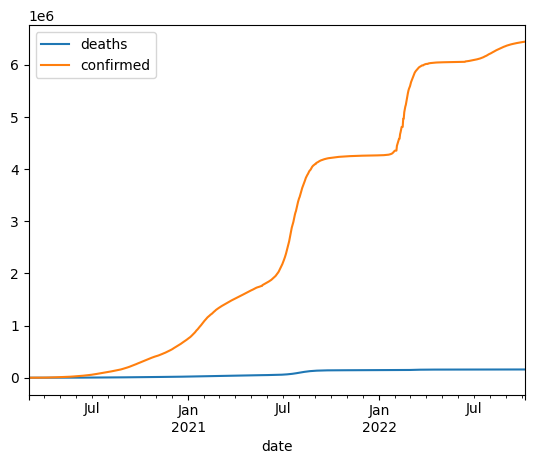

In [408]:
# Melakukan plotting untuk negara indonesia, guna mengetahui perkembangan jumlah kematian dan jumlah infeksi covid.
CD[CD['country_region'] == 'Indonesia'].plot(x= 'date', y=['deaths','confirmed']) 


Bila menggunakan plot sama, angka kematian tidak terlalu jelas pertumbuhannya, namun angka infeksi di indonesia terjadi kurang lebih 2 lonjakan yang tajam dan, 1 lonjakan sedang. 1 lonjakan sedang sekitar januari  sampai maret 2021, lonjakan tertinggi pada pertengahan juni hingga september 2021, dan lonjakan tinggi terakhir pada bulan februari sampai maret 2022.

<AxesSubplot: xlabel='date'>

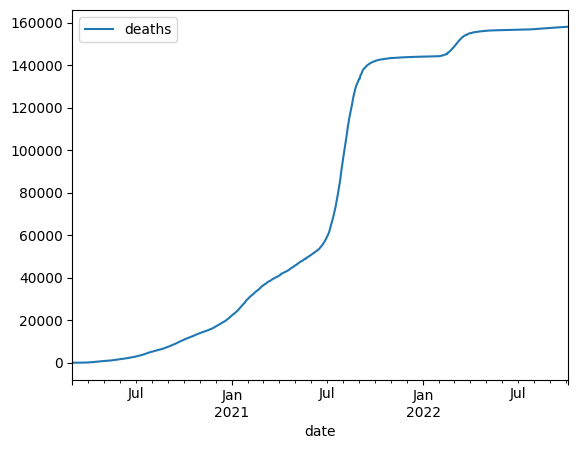

In [409]:
# Melakukan plotting untuk negara indonesia, guna mengetahui perkembangan angka kematian dan angka infeksi covid.
CD[CD['country_region'] == 'Indonesia'].plot(x= 'date', y=['deaths']) 

Bila dibandingkan dengan plot diatas, plot yang dihasilkan ternyata tidak jauh berbeda, namun dikarenakan jumlah data yang terlalu jauh menghasilkan garis rata untuk tingkat kematian. Tingkat kematian di indonesia terjadi lonjakan tajam pada bulan juli sampai september 2021, dan terjadi lonjakan sedang pada februari sampai april 2022.

In [410]:
'''Penulis penasaran dengan data malaysia dikarenakan mereka mempunyai data per provinsi, oleh karena itu dilakukan groupby per provinsi lalu per negara, dan mengambil data terakhir
di input nya saja. Diurutkan menurut nama negara.'''

TDM=CD.groupby(['province_state','country_region']).max(['date']).sort_values("country_region",ascending=True)
TDM

confirmed  deaths
province_state    country_region                   
Unknown           Brunei             229665     225
                  Burma              625497   19464
                  Cambodia           137906    3056
                  Indonesia         6441123  158177
                  Laos               215971     758
W.P. Kuala Lumpur Malaysia           439713  176021
Unknown           Malaysia          2127934   24078
W.P. Labuan       Malaysia            22278    9727
Terengganu        Malaysia           129764   40876
Selangor          Malaysia          1479929  624641
Johor             Malaysia           394075  152550
Sabah             Malaysia           395649  168086
Pulau Pinang      Malaysia           297871  107603
Perlis            Malaysia            18487    2542
Perak             Malaysia           228581   81005
Pahang            Malaysia           177718   48737
Negeri Sembilan   Malaysia           222586   92943
Melaka            Malaysia           135678   50756
Kelantan          Malaysia           254005   93392
Kedah             Malaysia           310185  117622
Sarawak           Malaysia           315999  145032
W.P. Putrajaya    Malaysia            27590    5552
Unknown           Philippines       3961349   63149
                  Singapore         1936270    1625
                  Thailand          4682132   32771
                  Timor-Leste         23266     138
                  Vietnam          11484659   43151

Ternyata data malaysia yang di input hanyalah per provinsi, dikarenakan bila dijumlahkan semua unknown tidak sesuai dengan data kematian dan infeksi total pada setiap provinsi malaysia. Penulis mengasumsikan bahwa data yang dimasukan pada unknown adalah penduduk yang terkena covid namun tidak dimasukan data provinsi dimana pasien tersebut berada. Oleh karena itu semua data malaysia akan penulis jumlahkan.

In [411]:
# Dilakukan groupby per negara dan menggunakan fungsi sum untuk menjumlahkan kematian dan kasus covid untuk negara malaysia. disort berdasarkan jumlah kasus covid terbanyak.

SUM=TDM.groupby('country_region')['confirmed','deaths'].sum().sort_values('confirmed',ascending=False)
SUM

C:\Users\toshi\AppData\Local\Temp\ipykernel_14112\1252367047.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SUM=TDM.groupby('country_region')['confirmed','deaths'].sum().sort_values('confirmed',ascending=False)


,confirmed,deaths
country_region,,
Vietnam,11484659,43151
Malaysia,6978042,1941163
Indonesia,6441123,158177
Thailand,4682132,32771
Philippines,3961349,63149
Singapore,1936270,1625
Burma,625497,19464
Brunei,229665,225
Laos,215971,758


<AxesSubplot: xlabel='country_region'>

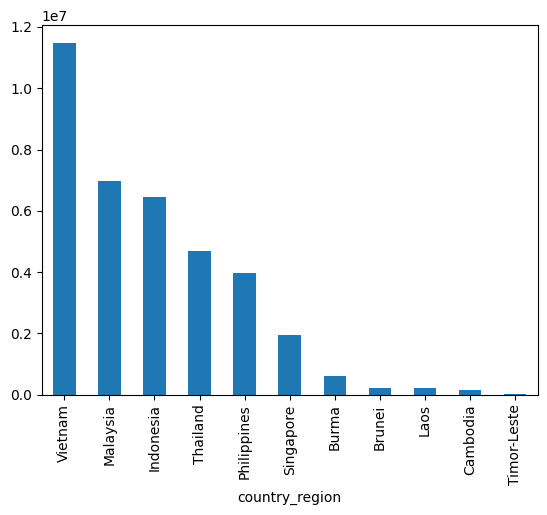

In [412]:
# Melakukan plotting untuk melihat grafik statistik kasus covid setiap negara.
SUM['confirmed'].plot(kind='bar')


<AxesSubplot: xlabel='country_region'>

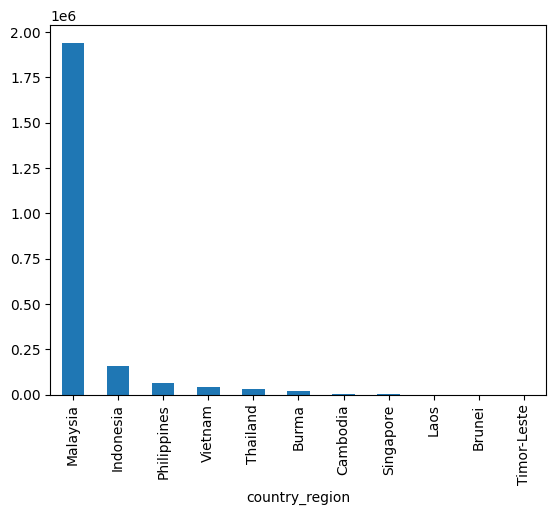

In [413]:
# Dilakukan plotting untuk melihat grafik statistik kematian di setiap negara. Namun dataset akan di sort dulu dengan tingkat kematian tertinggi agar grafik rapih.
SUM=SUM.sort_values('deaths',ascending=False)
SUM['deaths'].plot(kind='bar')

Setelah dilakukan proses groupby. ternyata posisi indonesia untuk kasus infeksi covid terbanyak berada di posisi ke 3 diantara negara-negara asia tenggara. Dan jumlah kematian tertinggi indonesia berada di posisi ke 2. Namun data ini belum menjabarkan apakah indonesia memiliki tingkat kematian tertinggi bila dibandingkan dengan jumlah penduduk yang terinfeksi covid, oleh karena itu perlu dilakukan pengolahan data lebih lanjut.

In [414]:
# Menambahkan data tingkat kematian, dengan membagikan jumlah kematian dengan jumlah kasus. Yang akan didapatkan persentasinya.
SUM['tingkat_kematian']=SUM['deaths']/SUM['confirmed']

In [415]:
SUM=SUM.sort_values('tingkat_kematian',ascending=False)
SUM

,confirmed,deaths,tingkat_kematian
country_region,,,
Malaysia,6978042,1941163,0.278182
Burma,625497,19464,0.031118
Indonesia,6441123,158177,0.024557
Cambodia,137906,3056,0.022160
Philippines,3961349,63149,0.015941
Thailand,4682132,32771,0.006999
Timor-Leste,23266,138,0.005931
Vietnam,11484659,43151,0.003757
Laos,215971,758,0.003510


<AxesSubplot: xlabel='country_region'>

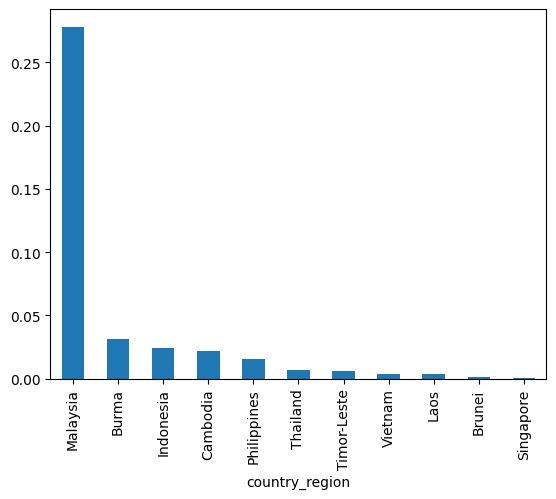

In [416]:
# Melakukan plotting tingkat kematian.
SUM['tingkat_kematian'].plot(kind='bar')

Ternyata untuk tingkat kematian pasien yang terinfeksi covid. Indonesia berada diposisi ke 3, yang memiliki probabilitas 2,45% untuk meninggal.

In [417]:
# Melakukan penamaan ulang kolom agar agar lebih mudah dimengerti.
SUM = SUM.rename(columns={'confirmed':'jumlah_kasus_covid'})
SUM = SUM.rename(columns={'deaths':'jumlah_kematian'})
SUM

,jumlah_kasus_covid,jumlah_kematian,tingkat_kematian
country_region,,,
Malaysia,6978042,1941163,0.278182
Burma,625497,19464,0.031118
Indonesia,6441123,158177,0.024557
Cambodia,137906,3056,0.022160
Philippines,3961349,63149,0.015941
Thailand,4682132,32771,0.006999
Timor-Leste,23266,138,0.005931
Vietnam,11484659,43151,0.003757
Laos,215971,758,0.003510


## Conclusions, Assumptions, Overall Analysis

Untuk kesimpulannya, 
1. Pertumbuhan covid di indonesia pada awalnya tidak terlalu banyak, namun terjadi lonjakan sebanyak 3x selama periode 2019-2022. Tingkat kematian di indonesia pada awalnya tidak terlalu mengkhawatirkan, namun terjadi lonjakan pada saat pertengahan 2021. Yang dimana terjadi mutasi varian delta
2. Tingkat kematian keseluruhan untuk saat ini di indonesia berada pada 2.45% untuk pasien yang terjangkit covid.
3. Indonesia di asia tenggara merupakan negara yang terkena infeksi covid terbanyak ke 3, jumlah kematian tertinggi ke 2 dan memiliki tingkat kematian tertinggi ke 3 di asia tenggara. 

Bisa diambil kesimpulan bahwa secara keseluruhan Indonesia dalam penanganan covid kurang baik bila dibandingkan dengan negara-negara lainnya di asia tenggara. Terutama pada saat terjadi mutasi varian delta di pertengahan tahun 2021. Namun dapat diasumsikan juga bahwa indonesia secara keseluruhan sudah menangani covid dengan baik, hanya saja terjadi keteledoran/kurang siap pada saat mutasi delta terjadi pada pertengahan tahun 2021 terlihat pada 2 plot dibawah ini.

<AxesSubplot: xlabel='date'>

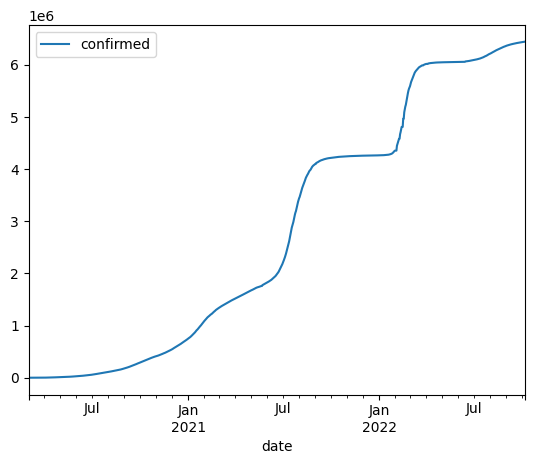

In [418]:
CD[CD['country_region'] == 'Indonesia'].plot(x= 'date', y=['confirmed']) 


<AxesSubplot: xlabel='date'>

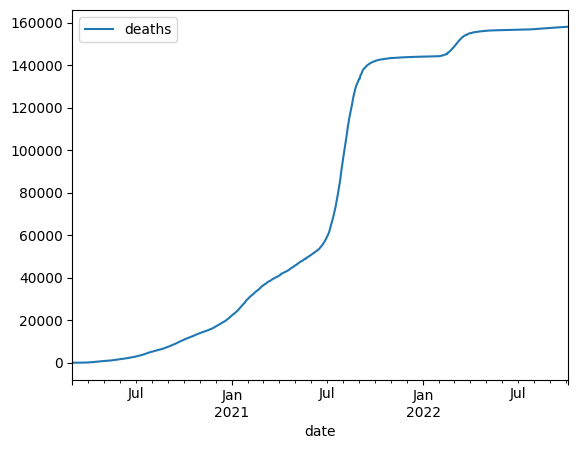

In [419]:
CD[CD['country_region'] == 'Indonesia'].plot(x= 'date', y=['deaths']) 

Ini membuktikan bahwa tingkat kematian dan infeksi di indonesia terjadi pada pertengahan 2021 dimana covid delta bermutasi. Namun untuk periode lainnya indonesia bisa dibilang mampu menangani covid dengan baik, meskipun tingkat infeksi meningkat tapi tingkat kematian masih bisa terkontrol. Secara overall, covid di indonesia bisa dibilang tidak terlalu berbahaya. Dan dibawah dilampirkan tabel yang telah diolah.

In [420]:
SUM

,jumlah_kasus_covid,jumlah_kematian,tingkat_kematian
country_region,,,
Malaysia,6978042,1941163,0.278182
Burma,625497,19464,0.031118
Indonesia,6441123,158177,0.024557
Cambodia,137906,3056,0.022160
Philippines,3961349,63149,0.015941
Thailand,4682132,32771,0.006999
Timor-Leste,23266,138,0.005931
Vietnam,11484659,43151,0.003757
Laos,215971,758,0.003510
